## Questions

### Introduction to the problem 
An introduction section where you outline the problem as you understand it

- Crime has increased from 2003 to 2018.
- Certain categories are increasing (theft, esp auto theft)
- The area has also become more concentrated to Downtown area


### Goal - reduce crime

- Can we predict where the crime is more likely to happen in the future? e.g. Downtown area, Friday night etc.
- Then we can have more police patrol in the area during that time.



### Methodology - how to discover the largest opportunities?
2. Discuss your methodology for discovering the largest opportunities to reduce crime.

### Major Findings on the best opportunities (now & future)
3. A single slide that outlines your major findings on the best opportunities to reduce crime in SF. You should think about both the current situation as well as the trend to ensure that your opportunity assessment is valid now, and in the near future.

### XP & CI to validate the hypothesis
4. For at least 2 of the opportunities you identify, hypothesize about the root cause and recommend an experiment or causal inference analysis that might prove or disprove this hypothesis.


- XP: we have a hypothesis that having police patrol will reduce the crime (e.g. auto theft)
- To design the experiment, we can random assign areas to w and w/o police ?
- Can we ensure the independence of control and treatment?
- There could be collusion, then we can run city level experiment. (synthetic control) or (switchback)



### modeing 
5. For lt least 2 of your identified opportunities, create a model that predicts the weekly volume of incidents in 2018. Be prepared to explain your methodology. Feel free to use any means to obtain the answers (Python, R, etc.) and be prepared to share your code.


- Timeseries model? 
- Aggregate the data to a weekly level? 


### output - 45min
6. Expected Output: A 45-minute presentation.

## Setup

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib as plt
plt.style.use('ggplot')
%pylab inline

AttributeError: module 'matplotlib' has no attribute 'style'

In [17]:
import seaborn as sns

In [358]:
from sklearn.preprocessing import StandardScaler

## Call data EDA

* 3mn rows
* from 2016.03 - 2019.11

In [55]:
calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])

In [56]:
calls.columns = [col.strip() for col in calls.columns] 

In [58]:
calls.head()

,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location
0,193274171,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,San Francisco,CA,1,Premise Address,NaN
1,193274162,Fight No Weapon,2019-11-23,2019-11-23,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,San Francisco,CA,1,Premise Address,NaN
2,193274160,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,San Francisco,CA,1,Premise Address,NaN
3,193274158,Well Being Check,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,San Francisco,CA,1,Intersection,NaN
4,193274157,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,San Francisco,CA,1,Common Location,"Duboce Park, Sf"


In [385]:
calls['Original Crime Type Name'].value_counts()

Passing Call          447929
Traffic Stop          284572
Suspicious Person     151450
Homeless Complaint    142353
22500e                104197
                       ...  
Poss Atte                  1
Caser/att                  1
Dog In Car                 1
Poss 5150'd                1
W/dirt Bikers              1
Name: Original Crime Type Name, Length: 22272, dtype: int64

In [294]:
m = incidents.join(calls.set_index('Address'), on = 'Address',how='inner')

In [295]:
m.shape

(0, 31)

In [49]:
calls.shape

(3035330, 12)

In [59]:
calls['Call Date'].max()

Timestamp('2019-11-23 00:00:00')

In [60]:
calls['Call Date'].min()

Timestamp('2016-03-30 00:00:00')

In [19]:
calls['Original Crime Type Name'].value_counts()

Passing Call          447929
Traffic Stop          284572
Suspicious Person     151450
Homeless Complaint    142353
22500e                104197
                       ...  
Poss Atte                  1
Caser/att                  1
Dog In Car                 1
Poss 5150'd                1
W/dirt Bikers              1
Name: Original Crime Type Name, Length: 22272, dtype: int64

In [22]:
calls['Disposition'].value_counts()

HAN             857071
GOA             392776
CIT             352517
ADV             312781
REP             245149
Not recorded    244488
UTL             130639
ND              124906
CAN             117199
NOM             102655
PAS              55458
NCR              25256
22               20924
ARR              20037
ABA              18884
ADM               7900
INC               2282
GEN               2250
SFD                889
OTS                657
DUP                262
HOT                 93
CRM                 52
VAS                 42
47A                 32
CHP                 27
TOW                 24
CRT                 22
ENC                 14
FIR                 12
CLN                  8
OME                  6
POL                  4
MAP                  4
TH2                  4
INS                  3
PDT                  2
TH3                  1
Name: Disposition, dtype: int64

In [26]:
calls['City'].value_counts()

San Francisco    2933579
Treasure Isla      20074
Yerba Buena         2833
Daly City           1420
Hunters Point        907
Presidio             875
Fort Mason            89
Brisbane              51
Name: City, dtype: int64

In [27]:
calls['State'].value_counts()

CA    3035330
Name: State, dtype: int64

In [28]:
calls['Agency Id'].value_counts()

1    3035330
Name: Agency Id, dtype: int64

In [29]:
calls['Address Type'].value_counts()

Premise Address    1535635
Intersection       1039619
Common Location     326515
Geo-Override        133561
Name: Address Type, dtype: int64

In [33]:
sum(calls['Common Location'].isnull())*1.0/calls.shape[0]

0.8924285003607515

In [1]:
calls.isnull()

NameError: name 'calls' is not defined

In [34]:
calls['Common Location'].value_counts()

Un Pz, Sf                        10919
Haight St Corridor                7673
Twin Peaks Viewpoint, Sf          6336
Powell St Muni, Sf                5774
One Hallidie Pz, Sf               5228
                                 ...  
Nordstrom Westfield #330, Sf         1
Hilton Hotel #887, Sf                1
Eddy Hotel Sro #215, Sf              1
Civic Center Hotel #240, Sf          1
Mcallister Hotel Sro #203, Sf        1
Name: Common Location, Length: 9154, dtype: int64

## Incidents data EDA - What crime, when, and where

* 2mn rows. from 2003 to 2018.05

### Feature engineering

In [61]:
incidents = pd.read_csv('police-department-incidents.csv',parse_dates=['Date'])

In [62]:
incidents.shape

(2215024, 13)

In [63]:
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",18036228907023
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'type': 'Point', 'coordinates': [-122.4192578...",18036094864020
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087926150
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965010
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965015


In [71]:
incidents['year'] = incidents['Date'].apply(lambda x: x.year)

In [72]:
incidents['month'] = incidents['Date'].apply(lambda x: x.month)

In [75]:
incidents['day_of_month'] = incidents['Date'].apply(lambda x: x.day)

In [122]:
incidents['hour'] = incidents['Time'].apply(lambda x: pd.to_datetime(x, format='%H:%M').hour)

In [123]:
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year,month,day,day_of_month,hour
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",18036228907023,2018,5,15,15,10
32,180359850,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Monday,2018-05-14,17:30,MISSION,NONE,FLORIDA ST / 16TH ST,-122.411456,37.765549,"{'type': 'Point', 'coordinates': [-122.4114562...",18035985027130,2018,5,14,14,17
33,180359850,OTHER OFFENSES,RESISTING ARREST,Monday,2018-05-14,17:30,MISSION,NONE,FLORIDA ST / 16TH ST,-122.411456,37.765549,"{'type': 'Point', 'coordinates': [-122.4114562...",18035985027170,2018,5,14,14,17
34,180360669,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,2018-05-14,17:00,SOUTHERN,NONE,3RD ST / HARRISON ST,-122.397389,37.782554,"{'type': 'Point', 'coordinates': [-122.3973887...",18036066906243,2018,5,14,14,17
35,180359769,NON-CRIMINAL,AIDED CASE,Monday,2018-05-14,16:40,SOUTHERN,NONE,500 Block of 6TH ST,-122.401787,37.775374,"{'type': 'Point', 'coordinates': [-122.4017870...",18035976951040,2018,5,14,14,16


#### We have visibility from 2003 to 2018 crime records. Crimes are growing every year.

- Are these records complete and continous?
- Are categories consistent across all years?


In [64]:
incidents['Date'].max()

Timestamp('2018-05-15 00:00:00')

In [65]:
incidents['Date'].min()

Timestamp('2003-01-01 00:00:00')

In [ ]:
figure = figsize(10,4)
plt.plot(incidents.groupby('year').apply(count_rows))
# xticks(range(n_crime.shape[0]), n_crime.index, rotation = '50')
xlabel('Year', size = 15)
ylabel('Number of Crimes', size = 15)
title('Crime in SF is Going Up', size = 18);


#### Top crime categories across all years are 
- Theft
- Other offenses
- Non criminal
- Assualt
- Vehicle theft
- Drug
- ...

In [66]:
incidents['Category'].value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

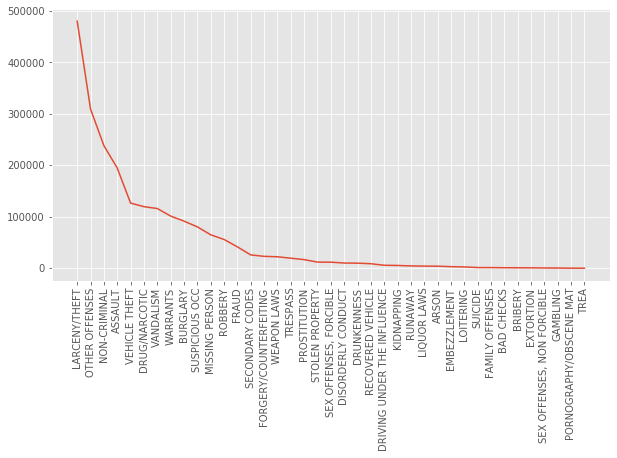

In [177]:
figure =figsize(10,5)
plt.plot(incidents['Category'].value_counts())
xticks(rotation = '90');

#### Across all years, top 4 crime categories take 55% of all records. Top 13 categories take 91% of all records.

In [184]:
sum(incidents['Category'].value_counts()[:4]) *1.0 /sum(incidents['Category'].value_counts())

0.5520590809993531

In [186]:
incidents['Category'].value_counts()[:13]

LARCENY/THEFT     480445
OTHER OFFENSES    309350
NON-CRIMINAL      238322
ASSAULT           194690
VEHICLE THEFT     126601
DRUG/NARCOTIC     119626
VANDALISM         116058
WARRANTS          101376
BURGLARY           91542
SUSPICIOUS OCC     80444
MISSING PERSON     64961
ROBBERY            55864
FRAUD              41542
Name: Category, dtype: int64

In [185]:
sum (incidents['Category'].value_counts()[:13]) * 1.0 / sum(incidents['Category'].value_counts())

0.9123374204794327

#### How are crimes categories trending over the years?  

**From heatmap overview on Top13 categories** 
- Theft has increased significantly over the years
- Non-criminal has increased 

- Vehicle theft as decreased over the years


In [205]:
top_categories = list(incidents['Category'].value_counts()[:13].index)

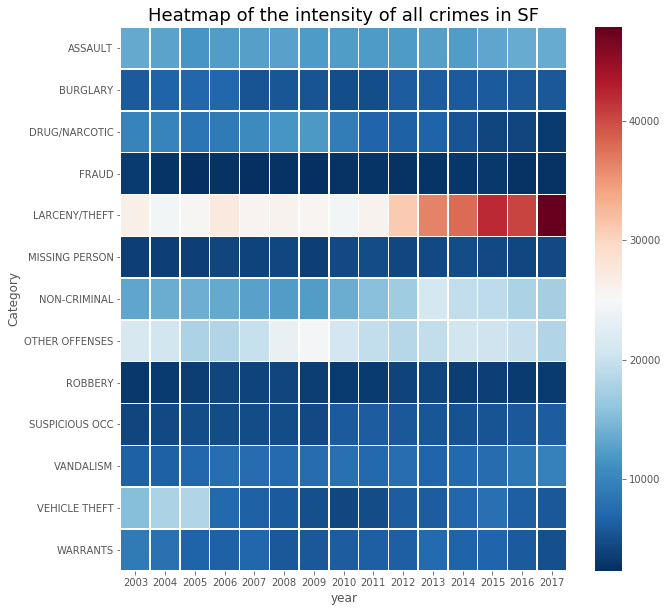

In [201]:
mask_year = incidents['year'] <= 2017
n_crime_year = incidents[mask_year][['Category', 'year']]
n_crime = n_crime_year[n_crime_year['Category'].apply(lambda x: x in top_categories)]
m = n_crime.groupby(['Category', 'year']).apply(lambda x: len(x)).unstack()
figure = figsize(10, 10)

sns.heatmap(m, cmap='RdBu_r', linewidth=0.5);
title('Heatmap of the intensity of all crimes in SF', fontsize = 18);

#### What are inside Non-criminal(no.3) and Other offenses(no.2) ? 

In [207]:
top_cat_inci = incidents[incidents['Category'].apply (lambda x: x in top_categories)]

In [209]:
tmp = top_cat_inci[['Category','Descript']].groupby(['Category','Descript']).apply(lambda x: len(x)).unstack()

In [219]:
top_cat_inci[top_cat_inci['Category'] == 'NON-CRIMINAL']['Descript'].value_counts()

LOST PROPERTY                                         77956
AIDED CASE, MENTAL DISTURBED                          56312
FOUND PROPERTY                                        33383
AIDED CASE                                            14250
DEATH REPORT, CAUSE UNKNOWN                           10735
CASE CLOSURE                                           6021
STAY AWAY OR COURT ORDER, NON-DV RELATED               4311
AIDED CASE, DOG BITE                                   3543
CIVIL SIDEWALKS, CITATION                              3040
PROPERTY FOR IDENTIFICATION                            2777
AIDED CASE, INJURED PERSON                             2688
COURTESY REPORT                                        2466
DEATH REPORT, NATURAL CAUSES                           2338
CIVIL SIDEWALKS, WARNING                               2317
AIDED CASE -PROPERTY FOR DESTRUCTION                   2317
FIRE REPORT                                            2028
SEARCH WARRANT SERVICE                  

In [222]:
top_cat_inci[top_cat_inci['Category'] == 'OTHER OFFENSES']['Descript'].value_counts()

DRIVERS LICENSE, SUSPENDED OR REVOKED                  62533
TRAFFIC VIOLATION                                      38103
RESISTING ARREST                                       21473
MISCELLANEOUS INVESTIGATION                            20218
PROBATION VIOLATION                                    18080
                                                       ...  
PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION        1
HAZARDOUS MATERIALS, STORE WITHOUT PERMIT                  1
REFUSAL TO IDENTIFY                                        1
VIOLATION OF CALIF UNEMPLOYMENT INSURANCE ACT              1
UNSOLICITED FAX ADVERTISING                                1
Name: Descript, Length: 179, dtype: int64

In [223]:
top_cat_inci[top_cat_inci['Category'] == 'LARCENY/THEFT']['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO         178834
PETTY THEFT FROM LOCKED AUTO          51946
PETTY THEFT OF PROPERTY               46114
GRAND THEFT OF PROPERTY               29420
PETTY THEFT FROM A BUILDING           25727
                                      ...  
LOOTING DURING STATE OF EMERGENCY         4
THEFT, DRUNK ROLL, ATT.                   4
THEFT, GRAND, AGRICULTURAL                4
ATTEMPTED THEFT PHONE BOOTH               3
THEFT, ANIMAL, ATT.                       2
Name: Descript, Length: 63, dtype: int64

In [224]:
top_cat_inci[top_cat_inci['Category'] == 'ASSAULT']['Descript'].value_counts()

BATTERY                                                 67652
THREATS AGAINST LIFE                                    34669
INFLICT INJURY ON COHABITEE                             17948
AGGRAVATED ASSAULT WITH A DEADLY WEAPON                 16405
AGGRAVATED ASSAULT WITH BODILY FORCE                    12522
                                                        ...  
ATTEMPTED HOMICIDE WITH EXPLOSIVES                          2
AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING               2
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ FULL AUTO        1
ATTEMPTED HOMICIDE BY SNIPING                               1
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO        1
Name: Descript, Length: 64, dtype: int64

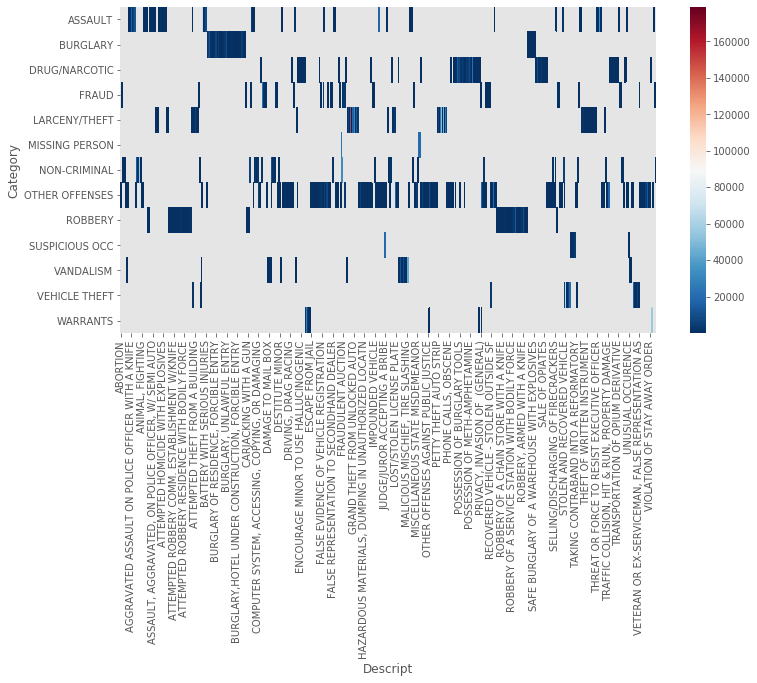

In [226]:
figure = figsize (12,6)
sns.heatmap(tmp,cmap='RdBu_r');

In [238]:
incidents['Descript'].value_counts(1)*100

GRAND THEFT FROM LOCKED AUTO                          8.073795
LOST PROPERTY                                         3.519469
BATTERY                                               3.054276
STOLEN AUTOMOBILE                                     2.923847
DRIVERS LICENSE, SUSPENDED OR REVOKED                 2.823169
                                                        ...   
MERCHANDISE TITLE DOCUMENT FRAUD                      0.000045
PUBLIC UTILITY INFORMATION, FRAUDULENTLY OBTAINING    0.000045
ASSAULT TO ROB WITH BODILY FORCE                      0.000045
TRANSPORTATION OF OPIUM                               0.000045
ASSAULT TO ROB BANK WITH A GUN                        0.000045
Name: Descript, Length: 915, dtype: float64

#### Across all years, 62% cases were not resolved; 31% were arrested.

* How does the resolvation change over year and over categories?
* Maybe most of the cases in "Non offense" are in the "None"?

In [1]:
incidents['Resolution'].value_counts(1)

NameError: name 'incidents' is not defined

In [227]:
incidents['Resolution'].value_counts()[0] * 1.0 / sum(incidents['Resolution'].value_counts())

0.627308077271576

In [230]:
sum(incidents['Resolution'].value_counts()[1:3]) * 1.0/ sum(incidents['Resolution'].value_counts())

0.3068876515636844

In [234]:
incidents['Resolution'].value_counts(1)

NONE                                      0.627308
ARREST, BOOKED                            0.237005
ARREST, CITED                             0.069882
LOCATED                                   0.015559
PSYCHOPATHIC CASE                         0.013176
UNFOUNDED                                 0.010745
JUVENILE BOOKED                           0.006392
COMPLAINANT REFUSES TO PROSECUTE          0.003652
DISTRICT ATTORNEY REFUSES TO PROSECUTE    0.003591
NOT PROSECUTED                            0.003485
JUVENILE CITED                            0.002974
PROSECUTED BY OUTSIDE AGENCY              0.002289
EXCEPTIONAL CLEARANCE                     0.001922
JUVENILE ADMONISHED                       0.001356
JUVENILE DIVERTED                         0.000313
CLEARED-CONTACT JUVENILE FOR MORE INFO    0.000311
PROSECUTED FOR LESSER OFFENSE             0.000038
Name: Resolution, dtype: float64

In [108]:
incidents['Location'][0]

"{'type': 'Point', 'coordinates': [-122.41191202732877, 37.77520656149669]}"

### When do crimes occure?

In [103]:
incidents['DayOfWeek'].value_counts()

Friday       337941
Wednesday    324020
Saturday     320593
Thursday     316156
Tuesday      315126
Monday       306565
Sunday       294592
Name: DayOfWeek, dtype: int64

In [105]:
incidents['PdDistrict'].value_counts()

SOUTHERN      399774
MISSION       300063
NORTHERN      272713
CENTRAL       226255
BAYVIEW       220999
INGLESIDE     194180
TENDERLOIN    191744
TARAVAL       166971
PARK          125476
RICHMOND      116817
Name: PdDistrict, dtype: int64

In [128]:
incidents['hour'].value_counts()

18    140917
17    135475
12    132631
19    126397
16    125548
15    120190
20    115007
22    113915
0     113094
14    112078
21    109556
13    108540
23    104730
11     97620
10     95469
9      89303
8      82459
1      65179
7      55551
2      54547
3      35596
6      33494
4      25284
5      22413
Name: hour, dtype: int64

### Where do crimes occur?

In [266]:
incidents[['X','Y']].describe()

,X,Y
count,2.214993e+06,2.214993e+06
mean,-1.224229e+02,3.777076e+01
std,2.983475e-02,4.203625e-01
min,-1.225136e+02,3.770788e+01
25%,-1.224332e+02,3.775302e+01
50%,-1.224166e+02,3.777542e+01
75%,-1.224069e+02,3.778448e+01
max,-1.205000e+02,9.000000e+01


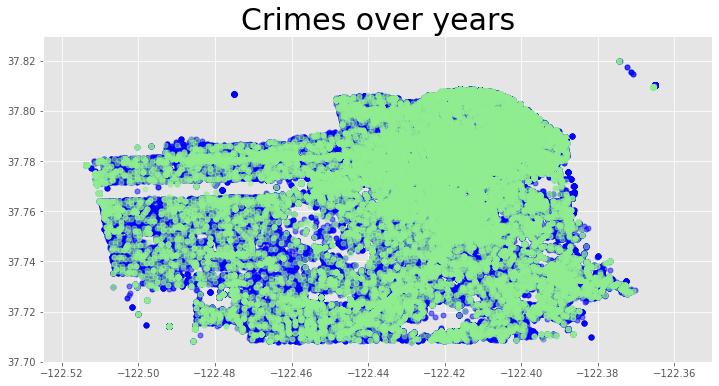

In [283]:
xlim(-122.525, -122.35);
ylim(37.7,37.83);
title('Crimes over years', fontsize=30);
years= [2003, 2018]
colors = ['b', 'lightgreen']
alphas = [0.5, 0.5]

for year, color, alpha in zip(years,colors, alphas) :
    x = incidents[incidents["year"]==year]["X"]
    y = incidents[incidents["year"]==year]["Y"]

    plot(x, y, '.', ms=10, color=color, alpha = alpha);

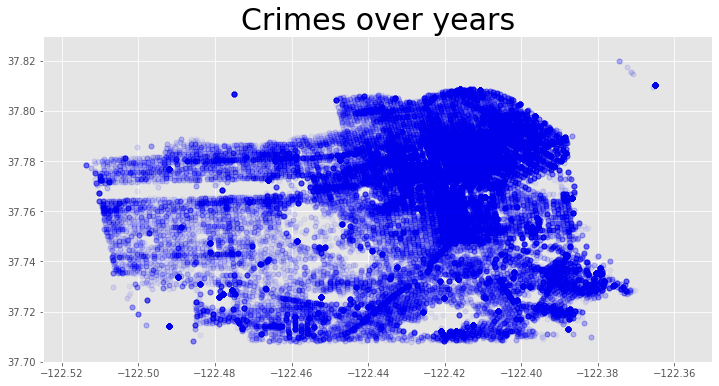

In [282]:
xlim(-122.525, -122.35);
ylim(37.7,37.83);
title('Crimes over years', fontsize=30);
years= [2003]
colors = ['b']
alphas = [0.05]

for year, color, alpha in zip(years,colors, alphas) :
    x = incidents[incidents["year"]==year]["X"]
    y = incidents[incidents["year"]==year]["Y"]

    plot(x, y, '.', ms=10, color=color, alpha = alpha);

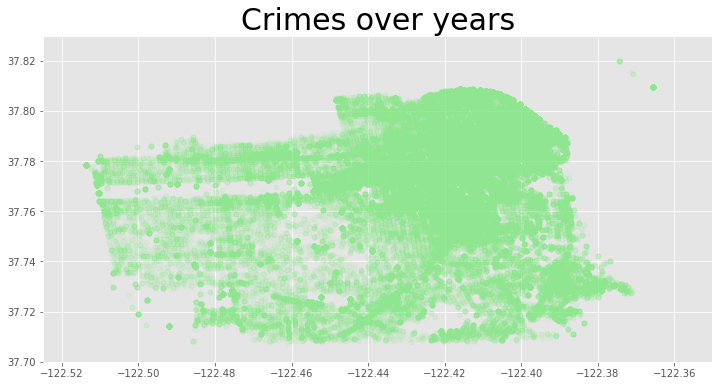

In [287]:
xlim(-122.525, -122.35);
ylim(37.7,37.83);
title('Crimes over years', fontsize=30);
years= [2017]
colors = ['lightgreen']
alphas = [0.05]

for year, color, alpha in zip(years,colors, alphas) :
    x = incidents[incidents["year"]==year]["X"]
    y = incidents[incidents["year"]==year]["Y"]

    plot(x, y, '.', ms=10, color=color, alpha = alpha);

In [ ]:
coordinates = df['Location'].str.strip('()').str.split(', ', expand = True).rename(columns = {0: 'Latitude', 1: 'Longitude'})

## Join tables 

* incidents left join 2.2min
* inner join 40k rows (2016.03 - 2018.05) 
* there are 327k rows for incidents between 2016.03- 2018.05. It means only 40/327 (12%) has matching records in the calls.


In [142]:
# df.join(other.set_index('key'), on='key')
df = incidents.join(calls.set_index('Crime Id'), on ='IncidntNum',how = 'left', lsuffix='_inci',rsuffix='_calls')

In [144]:
# df.join(other.set_index('key'), on='key')
df2 = incidents.join(calls.set_index('Crime Id'), on ='IncidntNum',how = 'inner', lsuffix='_inci',rsuffix='_calls')

In [145]:
df2.shape

(40454, 31)

In [146]:
df2.head(10).transpose()

,0,49,94,263,361,366,367,370,371,372
IncidntNum,180362289,180360299,180360001,180360277,180353664,180353802,180353802,180353620,180353642,180353642
Category,VEHICLE THEFT,NON-CRIMINAL,BURGLARY,ASSAULT,NON-CRIMINAL,OTHER OFFENSES,SECONDARY CODES,NON-CRIMINAL,VEHICLE THEFT,SECONDARY CODES
Descript,STOLEN MOTORCYCLE,AIDED CASE,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",INFLICT INJURY ON COHABITEE,"CIVIL SIDEWALKS, CITATION","STAY AWAY ORDER VIOLATION, DV RELATED",DOMESTIC VIOLENCE,"CIVIL SIDEWALKS, CITATION",STOLEN AUTOMOBILE,DOMESTIC VIOLENCE
DayOfWeek,Tuesday,Monday,Sunday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday
Date,2018-05-15 00:00:00,2018-05-14 00:00:00,2018-05-13 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00,2018-05-12 00:00:00
Time,10:30,14:05,22:30,21:00,10:05,10:00,10:00,09:50,09:30,09:30
PdDistrict,SOUTHERN,CENTRAL,SOUTHERN,TARAVAL,PARK,SOUTHERN,SOUTHERN,PARK,BAYVIEW,BAYVIEW
Resolution,NONE,NONE,NONE,NONE,"ARREST, BOOKED",NONE,NONE,"ARREST, BOOKED",NONE,NONE
Address_inci,700 Block of TEHAMA ST,0 Block of CALIFORNIA ST,300 Block of 3RD ST,800 Block of BROTHERHOOD WAY,1100 Block of MASONIC AV,800 Block of BRYANT ST,800 Block of BRYANT ST,1500 Block of HAIGHT ST,1400 Block of SHAFTER AV,1400 Block of SHAFTER AV
X,-122.412,-122.397,-122.398,-122.477,-122.446,-122.403,-122.403,-122.448,-122.388,-122.388


In [147]:
df2['Date'].max()

Timestamp('2018-05-15 00:00:00')

In [148]:
df2['Date'].min()

Timestamp('2015-01-01 00:00:00')

In [149]:
df2['Call Date'].min()

Timestamp('2016-03-31 00:00:00')

In [143]:
df.shape

(2214993, 31)

In [132]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address_inci,X,...,Offense Date,Call Time,Call Date Time,Disposition,Address_calls,City,State,Agency Id,Address Type,Common Location
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,...,2018-02-05,14:41,2018-02-05 14:41:00,HAN,Larch St/buchanan St,San Francisco,CA,1.0,Intersection,NaN
32,180359850,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Monday,2018-05-14,17:30,MISSION,NONE,FLORIDA ST / 16TH ST,-122.411456,...,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,180359850,OTHER OFFENSES,RESISTING ARREST,Monday,2018-05-14,17:30,MISSION,NONE,FLORIDA ST / 16TH ST,-122.411456,...,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,180360669,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,2018-05-14,17:00,SOUTHERN,NONE,3RD ST / HARRISON ST,-122.397389,...,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,180359769,NON-CRIMINAL,AIDED CASE,Monday,2018-05-14,16:40,SOUTHERN,NONE,500 Block of 6TH ST,-122.401787,...,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df['Date'].max()

Timestamp('2018-05-15 00:00:00')

In [134]:
df['Date'].min()

Timestamp('2003-01-01 00:00:00')

In [135]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address_inci', 'X', 'Y', 'Location',
       'PdId', 'year', 'month', 'day', 'day_of_month', 'hour',
       'Original Crime Type Name', 'Report Date', 'Call Date', 'Offense Date',
       'Call Time', 'Call Date Time', 'Disposition', 'Address_calls', 'City',
       'State', 'Agency Id', 'Address Type', 'Common Location'],
      dtype='object')

In [136]:
df['Call Date'].min()

Timestamp('2016-03-31 00:00:00')

In [137]:
df['Call Date'].max()

Timestamp('2018-02-05 00:00:00')

In [141]:
df.head(200).transpose()

,0,32,33,34,35,36,37,38,39,40,...,221,222,223,224,225,226,227,228,229,230
IncidntNum,180362289,180359850,180359850,180360669,180359769,180359571,180359606,180359606,180359430,180359333,...,180355886,180355886,180355814,180355814,180355814,180355858,180357070,180355789,180355808,180355723
Category,VEHICLE THEFT,OTHER OFFENSES,OTHER OFFENSES,LARCENY/THEFT,NON-CRIMINAL,NON-CRIMINAL,ROBBERY,WARRANTS,DRUG/NARCOTIC,ASSAULT,...,LARCENY/THEFT,VANDALISM,WARRANTS,SUSPICIOUS OCC,OTHER OFFENSES,"SEX OFFENSES, FORCIBLE",VANDALISM,ASSAULT,LARCENY/THEFT,ROBBERY
Descript,STOLEN MOTORCYCLE,POSSESSION OF BURGLARY TOOLS,RESISTING ARREST,PETTY THEFT FROM LOCKED AUTO,AIDED CASE,"AIDED CASE, MENTAL DISTURBED","ROBBERY OF A COMMERCIAL ESTABLISHMENT, STRONGARM",ENROUTE TO OUTSIDE JURISDICTION,POSSESSION OF NARCOTICS PARAPHERNALIA,CHILD ABUSE (PHYSICAL),...,PETTY THEFT FROM LOCKED AUTO,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",ENROUTE TO OUTSIDE JURISDICTION,INVESTIGATIVE DETENTION,TRAFFIC VIOLATION ARREST,SEXUAL BATTERY,"MALICIOUS MISCHIEF, BREAKING WINDOWS",BATTERY,GRAND THEFT FROM LOCKED AUTO,"ROBBERY, ARMED WITH A KNIFE"
DayOfWeek,Tuesday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,...,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday
Date,2018-05-15 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,2018-05-14 00:00:00,...,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00,2018-05-13 00:00:00
Time,10:30,17:30,17:30,17:00,16:40,16:20,16:10,16:10,15:35,15:14,...,04:15,04:15,03:47,03:47,03:47,03:47,03:29,02:49,02:30,02:08
PdDistrict,SOUTHERN,MISSION,MISSION,SOUTHERN,SOUTHERN,RICHMOND,SOUTHERN,SOUTHERN,MISSION,MISSION,...,BAYVIEW,BAYVIEW,CENTRAL,CENTRAL,CENTRAL,SOUTHERN,SOUTHERN,SOUTHERN,TENDERLOIN,INGLESIDE
Resolution,NONE,NONE,NONE,NONE,NONE,NONE,"ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED",NONE,...,NONE,NONE,"ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED",NONE,NONE,NONE,NONE
Address_inci,700 Block of TEHAMA ST,FLORIDA ST / 16TH ST,FLORIDA ST / 16TH ST,3RD ST / HARRISON ST,500 Block of 6TH ST,2200 Block of DIVISADERO ST,900 Block of MARKET ST,900 Block of MARKET ST,1900 Block of MISSION ST,BRYANT ST / 16TH ST,...,INGALLS ST / WALLACE AV,INGALLS ST / WALLACE AV,MONTGOMERY ST / CALIFORNIA ST,MONTGOMERY ST / CALIFORNIA ST,MONTGOMERY ST / CALIFORNIA ST,1200 Block of MARKET ST,1900 Block of MARKET ST,400 Block of MINNA ST,400 Block of JONES ST,SUNNYDALE AV / HAHN ST
X,-122.412,-122.411,-122.411,-122.397,-122.402,-122.441,-122.408,-122.408,-122.42,-122.41,...,-122.387,-122.387,-122.403,-122.403,-122.403,-122.415,-122.426,-122.407,-122.413,-122.416


In [168]:
tmp = df[df['Date'] >= '2016-03-01']

In [169]:
sum(tmp['Date'] <= '2018-05-15')

327220

In [170]:
tmp.shape

(327220, 31)

## Zoom in: Theft

In [239]:
thefts = top_cat_inci[top_cat_inci['Category'] == "LARCENY/THEFT"]

In [240]:
thefts.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year,month,day,day_of_month,hour
34,180360669,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,2018-05-14,17:00,SOUTHERN,NONE,3RD ST / HARRISON ST,-122.397389,37.782554,"{'type': 'Point', 'coordinates': [-122.3973887...",18036066906243,2018,5,14,14,17
54,180359054,LARCENY/THEFT,GRAND THEFT SHOPLIFTING,Monday,2018-05-14,12:46,SOUTHERN,NONE,800 Block of MARKET ST,-122.406691,37.785207,"{'type': 'Point', 'coordinates': [-122.4066905...",18035905406364,2018,5,14,14,12
59,180358921,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,2018-05-14,12:10,NORTHERN,NONE,2300 Block of BAY ST,-122.445738,37.801574,"{'type': 'Point', 'coordinates': [-122.4457380...",18035892106244,2018,5,14,14,12
63,180358551,LARCENY/THEFT,GRAND THEFT FROM PERSON,Monday,2018-05-14,10:23,TENDERLOIN,NONE,100 Block of HYDE ST,-122.415533,37.782137,"{'type': 'Point', 'coordinates': [-122.4155330...",18035855106152,2018,5,14,14,10
73,180358244,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,2018-05-14,08:00,SOUTHERN,NONE,700 Block of MARKET ST,-122.405359,37.785977,"{'type': 'Point', 'coordinates': [-122.4053593...",18035824406363,2018,5,14,14,8


In [241]:
thefts.shape

(480445, 18)

In [256]:
top_ten_theft = thefts['Descript'].value_counts(1)[:10].index

In [244]:
def count_rows(x):
    return len(x)

In [250]:
f = thefts.groupby(['year','Descript']).apply(count_rows).unstack()

In [251]:
f

Descript,ATTEMPTED AUTO STRIP,ATTEMPTED GRAND THEFT FROM PERSON,ATTEMPTED GRAND THEFT PICKPOCKET,ATTEMPTED GRAND THEFT PURSESNATCH,ATTEMPTED MOTORCYCLE STRIP,ATTEMPTED PETTY THEFT OF PROPERTY,ATTEMPTED SHOPLIFTING,ATTEMPTED THEFT COIN OPERATED MACHINE,ATTEMPTED THEFT FROM A BUILDING,ATTEMPTED THEFT FROM LOCKED VEHICLE,...,"THEFT, BOAT","THEFT, DRUNK ROLL, $200-$400","THEFT, DRUNK ROLL, $50-$200","THEFT, DRUNK ROLL, <$50","THEFT, DRUNK ROLL, >$400","THEFT, DRUNK ROLL, ATT.","THEFT, GRAND, AGRICULTURAL","THEFT, GRAND, BY FIDUCIARY, >$400 IN 12 MONTHS","THEFT, GRAND, OF FIREARM","TRADE SECRETS, THEFT OR UNAUTHORIZED COPYING"
year,,,,,,,,,,,,,,,,,,,,,
2003,6.0,10.0,10.0,4.0,NaN,50.0,46.0,4.0,43.0,561.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,5.0,12.0,4.0,6.0,2.0,33.0,46.0,8.0,35.0,498.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,4.0,9.0,9.0,5.0,NaN,27.0,54.0,2.0,40.0,419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,9.0,7.0,6.0,8.0,NaN,25.0,49.0,8.0,33.0,627.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2007,5.0,25.0,10.0,5.0,2.0,33.0,32.0,1.0,35.0,433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2008,10.0,27.0,6.0,16.0,NaN,24.0,20.0,NaN,24.0,442.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,3.0,16.0,4.0,8.0,1.0,22.0,26.0,4.0,37.0,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN
2010,1.0,14.0,1.0,4.0,NaN,32.0,35.0,10.0,22.0,259.0,...,4.0,2.0,2.0,2.0,2.0,NaN,NaN,7.0,9.0,NaN
2011,NaN,10.0,3.0,4.0,1.0,13.0,33.0,4.0,29.0,188.0,...,3.0,1.0,8.0,1.0,6.0,NaN,1.0,9.0,17.0,NaN


In [252]:
f.reset_index(inplace = True)

#### Locked Auto is the biggest source of theft crime, and has increased significantly over the years

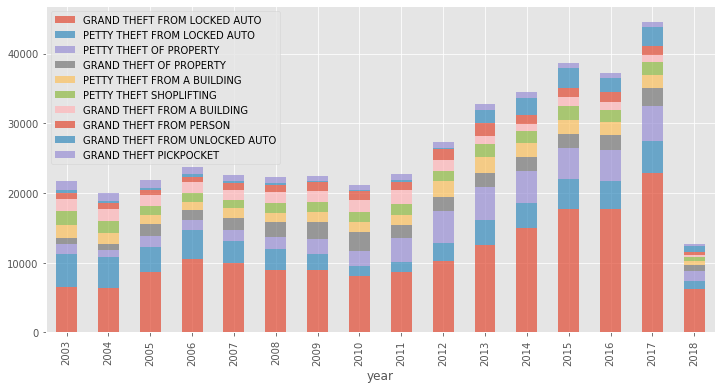

In [259]:
f.plot.bar(x='year',y=top_ten_theft, stacked = True,alpha = 0.7)
legend();

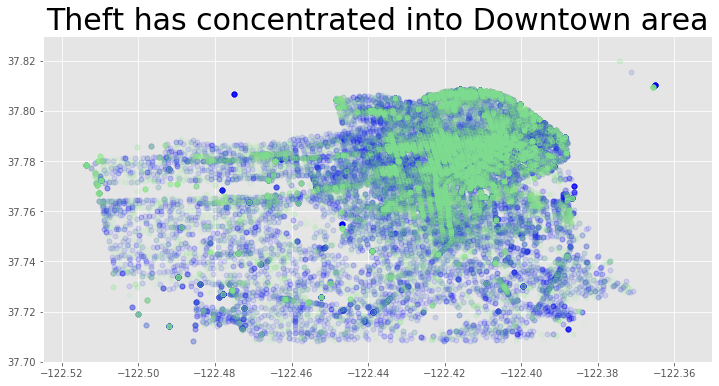

In [292]:
xlim(-122.525, -122.35);
ylim(37.7,37.83);
title('Theft has concentrated into Downtown area', fontsize=30);
years= [2003,2017]
colors = ['b','lightgreen']
alphas = [0.1,0.05]

for year, color, alpha in zip(years,colors, alphas) :
    x = thefts[thefts["year"]==year]["X"]
    y = thefts[thefts["year"]==year]["Y"]

    plot(x, y, '.', ms=10, color=color, alpha = alpha);

## Predicting crimes -- Theft


In [348]:
incidents.shape

(2214993, 18)

In [349]:
thefts.shape

(480444, 33)

In [350]:
thefts.shape[0] * 1.0/incidents.shape[0]

0.21690542588622178

In [351]:
incidents['PdDistrict'].value_counts()

SOUTHERN      399774
MISSION       300063
NORTHERN      272713
CENTRAL       226255
BAYVIEW       220999
INGLESIDE     194180
TENDERLOIN    191744
TARAVAL       166971
PARK          125476
RICHMOND      116817
Name: PdDistrict, dtype: int64

In [353]:
incidents.isnull().sum()

IncidntNum      0
Category        0
Descript        0
DayOfWeek       0
Date            0
Time            0
PdDistrict      1
Resolution      0
Address         0
X               0
Y               0
Location        0
PdId            0
year            0
month           0
day             0
day_of_month    0
hour            0
dtype: int64

In [354]:
# drop the only 1 row that has null PdDistrict
incidents = incidents.drop(incidents[incidents['PdDistrict'].isnull()].index)

In [302]:
def dummify(df, col_list):
    '''dummify categorical features.
    '''
    for col in col_list:
        if df[col].isnull().sum() == 0:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        else:
            dummies = pd.get_dummies(
                df[col], prefix=col, dummy_na=True, drop_first=True)
        df[dummies.columns] = dummies
    return df

In [329]:
cols_dummy = ['PdDistrict','DayOfWeek']

In [322]:
def drop_cols (df, col_list):
    df = df.drop(col_list, axis=1)
    return df 

In [332]:
cols_to_drop = ['IncidntNum','Category','Descript','Resolution','PdId','Location','year','day','DayOfWeek','Date','Time','PdDistrict','Address']

In [340]:
def feature_enginner(df, cols_dummy, cols_to_drop):
    df = dummify(df,cols_dummy)
    df = drop_cols(df, cols_to_drop)
    scaler = StandardScaler()
    scaler.fit(df.values)
    X = scaler.transform(df.values)
    return df, X 

In [355]:
df_fe, X = feature_enginner(incidents,cols_dummy, cols_to_drop)

In [356]:
df_fe.head()

,X,Y,month,day_of_month,hour,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,-122.411912,37.775207,5,15,10,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
32,-122.411456,37.765549,5,14,17,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
33,-122.411456,37.765549,5,14,17,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
34,-122.397389,37.782554,5,14,17,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
35,-122.401787,37.775374,5,14,16,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [357]:
df_fe.describe()

,X,Y,month,day_of_month,hour,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
count,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06,2.214992e+06
mean,-1.224229e+02,3.777076e+01,6.409063e+00,1.563886e+01,1.341591e+01,1.021471e-01,8.766623e-02,1.354691e-01,1.231214e-01,5.664851e-02,5.273924e-02,1.804855e-01,7.538221e-02,8.656645e-02,1.384046e-01,1.447378e-01,1.329987e-01,1.427346e-01,1.422696e-01,1.462850e-01
std,2.983475e-02,4.203626e-01,3.446184e+00,8.831976e+00,6.534587e+00,3.028417e-01,2.828089e-01,3.422240e-01,3.285766e-01,2.311698e-01,2.235125e-01,3.845914e-01,2.640071e-01,2.811988e-01,3.453242e-01,3.518363e-01,3.395734e-01,3.498021e-01,3.493265e-01,3.533917e-01
min,-1.225136e+02,3.770788e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.224332e+02,3.775302e+01,3.000000e+00,8.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-1.224166e+02,3.777542e+01,6.000000e+00,1.600000e+01,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,-1.224069e+02,3.778448e+01,9.000000e+00,2.300000e+01,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,-1.205000e+02,9.000000e+01,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [366]:
today = incidents['Date'].max()  # 2018-5-15

In [384]:
int(str(today - pd.to_datetime('2018-01-01'))[:3])/7

19.142857142857142

In [ ]:
df["last_login_today_months"] = (
        (df['LAST_LOGIN_DATE'] - today) / -np.timedelta64(1, 'M')).astype(int)
    no_nan_already_represented = [
        "VINTAGE_DATE", 'VINTAGE_YEAR', 'VINTAGE_MONTH', 'LAST_LOGIN_DATE']
    df = df.drop(no_nan_already_represented, axis=1)

In [362]:
incidents.groupby(['Category','year']).apply(count_rows).unstack()

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Category,,,,,,,,,,,,,,,,
ARSON,293.0,280.0,231.0,240.0,246.0,248.0,222.0,209.0,203.0,237.0,248.0,253.0,311.0,286.0,327.0,97.0
ASSAULT,13461.0,12899.0,11601.0,12449.0,12518.0,12681.0,12284.0,12387.0,12279.0,12181.0,12580.0,12402.0,13115.0,13603.0,13655.0,4595.0
BAD CHECKS,134.0,79.0,101.0,87.0,69.0,78.0,64.0,54.0,45.0,49.0,26.0,34.0,38.0,34.0,24.0,9.0
BRIBERY,28.0,39.0,38.0,36.0,56.0,49.0,46.0,61.0,47.0,64.0,69.0,56.0,73.0,67.0,67.0,17.0
BURGLARY,6047.0,6753.0,7071.0,7004.0,5454.0,5679.0,5379.0,4966.0,4987.0,6243.0,6195.0,6066.0,5931.0,5813.0,5857.0,2097.0
DISORDERLY CONDUCT,886.0,814.0,687.0,521.0,581.0,789.0,956.0,827.0,762.0,704.0,464.0,345.0,551.0,659.0,399.0,95.0
DRIVING UNDER THE INFLUENCE,289.0,244.0,196.0,266.0,313.0,408.0,579.0,458.0,470.0,421.0,448.0,381.0,430.0,378.0,299.0,92.0
DRUG/NARCOTIC,9917.0,9897.0,8533.0,9069.0,10560.0,11648.0,11950.0,9205.0,6935.0,6444.0,6775.0,5408.0,4251.0,4246.0,3308.0,1480.0
DRUNKENNESS,662.0,600.0,636.0,703.0,671.0,710.0,804.0,706.0,652.0,644.0,954.0,620.0,576.0,465.0,339.0,84.0
